<a href="https://colab.research.google.com/github/mahn-bonnie/Artificial-Intelligence/blob/master/Lab9_Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

# Task **1**

In [49]:
housingPricesDf=pd.read_csv('q1.csv')
housingPricesDf

,Size (sq ft),Bedrooms,Year Built,Price (USD)
0,1500,3,1990,250000
1,2000,4,1985,300000
2,1200,2,2000,200000
3,1800,3,1970,275000
4,2200,4,1988,350000
5,1400,2,1995,225000
6,1600,3,2005,275000
7,2400,4,1975,400000
8,1900,3,1998,325000
9,1700,2,1980,250000


In [50]:
X=housingPricesDf.drop('Price (USD)',axis=1).values
y=housingPricesDf['Price (USD)'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=0)
reg= LinearRegression()
reg.fit(X_train,y_train)
predictions= reg.predict(X_test)
print('Accuracy:',r2_score(y_test,predictions)*100)

Accuracy: 97.84987982651964


Text(0, 0.5, 'Predicted Prices (USD)')

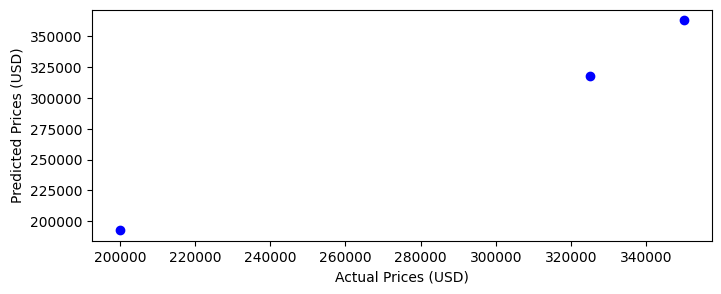

In [51]:
plt.figure(figsize=(8,3))
plt.scatter(y_test,predictions,color='blue')
plt.xlabel('Actual Prices (USD)')
plt.ylabel('Predicted Prices (USD)')

In [52]:
differenceDf=pd.DataFrame({'Actual Prices (USD)':y_test,'Predicted Prices (USD)':predictions,'Difference (USD)':y_test-predictions})
differenceDf.head()

,Actual Prices (USD),Predicted Prices (USD),Difference (USD)
0,200000,192701.772374,7298.227626
1,325000,317888.530833,7111.469167
2,350000,363186.611982,-13186.611982


# **Task 2**

In [53]:
teleCommDf=pd.read_csv('q2.csv')
teleCommDf=teleCommDf.drop('Customer ID',axis=1)
replace_dict= {'Female':0,'Male':1}
le = preprocessing.LabelEncoder()
teleCommDf['Location']=le.fit_transform(teleCommDf['Location'])
teleCommDf['Internet Service']=le.fit_transform(teleCommDf['Internet Service'])
teleCommDf['Gender']=teleCommDf['Gender'].map(replace_dict)
teleCommDf

,Age,Gender,Location,Monthly Charges,Internet Service,Phone Service,TV Service,Churn
0,35,1,1,50,1,1,1,1
1,44,0,0,70,0,1,0,0
2,22,1,2,30,0,1,0,1
3,55,0,1,80,1,1,1,0
4,33,1,0,45,0,1,0,0
5,20,0,2,25,0,1,0,1
6,68,1,1,100,1,1,1,1
7,50,0,0,60,0,1,0,0
8,27,1,2,35,0,1,0,0
9,41,0,1,90,1,1,1,1


In [56]:
X= teleCommDf.drop(['Churn','Age'],axis=1).values
y= teleCommDf['Churn'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)
decisionTree=DecisionTreeClassifier()
decisionTree.fit(X_train,y_train)
predictions=decisionTree.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions)*100)

Accuracy: 66.66666666666666


Text(0, 0.5, 'Predicted Churn')

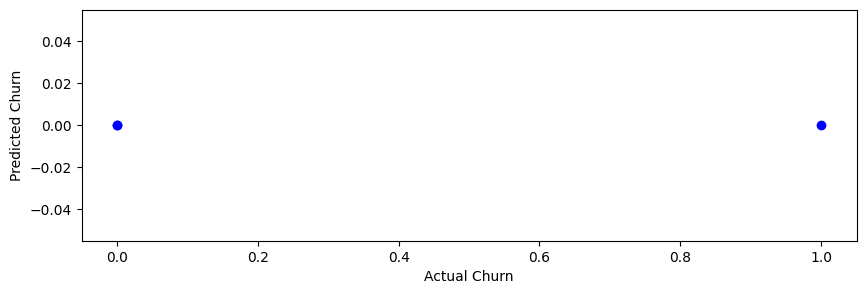

In [57]:
plt.figure(figsize=(10,3))
plt.scatter(y_test,predictions,color='blue')
plt.xlabel('Actual Churn')
plt.ylabel('Predicted Churn')

In [58]:
differenceDf=pd.DataFrame({'Actual Churn':y_test,'Predicted Churn':predictions,'Difference':y_test-predictions})
differenceDf.head()

,Actual Churn,Predicted Churn,Difference
0,0,0,0
1,0,0,0
2,1,0,1


# **Task 3**

In [59]:
flowerDf= pd.read_csv('q3.csv')
flowerDf=flowerDf.drop('ID',axis=1)
le= preprocessing.LabelEncoder()
flowerDf['Species']=le.fit_transform(flowerDf['Species'])
flowerDf

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,7.0,3.2,4.7,1.4,1
4,6.4,3.2,4.5,1.5,1
5,6.9,3.1,4.9,1.5,1
6,6.5,3.0,5.2,2.0,2
7,6.2,3.4,5.4,2.3,2
8,5.9,3.0,5.1,1.8,2


In [60]:
X= flowerDf.drop('Species',axis=1).values
y= flowerDf['Species'].values
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)
knc= KNeighborsClassifier(n_neighbors=3)
knc.fit(X_train,y_train)
predictions= knc.predict(X_test)
print('Accuracy Score:',r2_score(y_test,predictions)*100)

Accuracy Score: 100.0


Text(0, 0.5, 'Predicted Species')

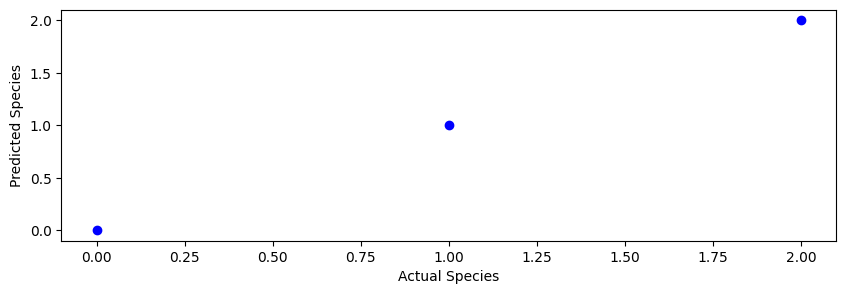

In [61]:
plt.figure(figsize=(10,3))
plt.scatter(y_test,predictions,color='blue')
plt.xlabel('Actual Species')
plt.ylabel('Predicted Species')

In [62]:
differenceDf=pd.DataFrame({'Actual Species':y_test,'Predicted Species':predictions,'Difference':y_test-predictions})
differenceDf.head()

,Actual Species,Predicted Species,Difference
0,1,1,0
1,0,0,0
2,2,2,0


# **Task 4**

In [63]:
financeDf= pd.read_csv('q4.csv')
le= preprocessing.LabelEncoder()
financeDf=financeDf.drop('ID',axis=1)
financeDf['Fraudulent']=le.fit_transform(financeDf['Fraudulent'])
financeDf['Location']=le.fit_transform(financeDf['Location'])
financeDf['Time']=le.fit_transform(financeDf['Time'])
financeDf

,Amount,Location,Time,Fraudulent
0,100,2,7,0
1,200,0,1,0
2,50,2,5,1
3,75,1,0,0
4,300,2,3,1
5,150,2,6,1
6,25,0,8,0
7,500,1,4,1
8,80,2,2,0


In [64]:
X= financeDf.drop('Fraudulent',axis=1).values
y= financeDf['Fraudulent'].values
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3,random_state=12,stratify=y)
svmClf = SVC(kernel='linear')
svmClf.fit(X_train, y_train)
predictions= svmClf.predict(X_test)
print('Accuracy Score:',r2_score(y_test,predictions)*100)

Accuracy Score: 100.0


Text(0, 0.5, 'Predicted Fraudulent')

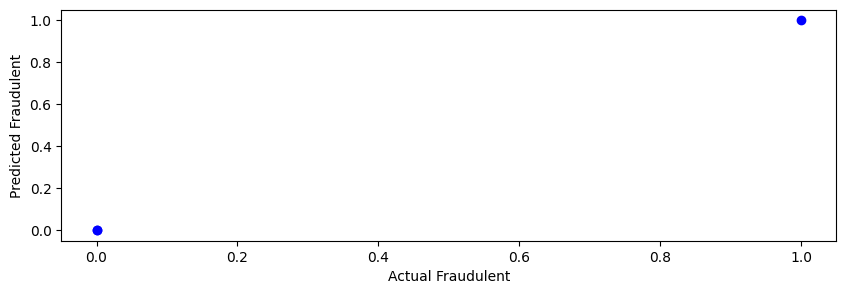

In [65]:
plt.figure(figsize=(10,3))
plt.scatter(y_test,predictions,color='blue')
plt.xlabel('Actual Fraudulent')
plt.ylabel('Predicted Fraudulent')

In [66]:
differenceDf=pd.DataFrame({'Actual Fraudulent':y_test,'Predicted Fraudulent':predictions,'Difference':y_test-predictions})
differenceDf.head()

,Actual Fraudulent,Predicted Fraudulent,Difference
0,1,1,0
1,0,0,0
2,0,0,0


# **Task 5**

In [67]:
marketingDf= pd.read_csv('q5.csv')
marketingDf= marketingDf.drop('Customer ID',axis=1)
le= preprocessing.LabelEncoder()
marketingDf['Gender']= le.fit_transform(marketingDf['Gender'])
marketingDf['Education']= le.fit_transform(marketingDf['Education'])
marketingDf

,Age,Gender,Income,Education,Total Spending,Purchase Frequency,Items Purchased
0,24,1,40000,0,500,10,20
1,35,0,60000,0,1000,5,10
2,50,1,80000,1,2000,2,5
3,42,0,70000,1,1500,4,12
4,28,1,45000,0,800,8,18
5,38,0,90000,1,2500,1,3
6,56,1,120000,2,3000,1,5
7,33,0,55000,0,1200,6,15
8,45,1,65000,1,1800,3,7


[[100   2   7]
 [200   0   1]
 [ 50   2   5]
 [ 75   1   0]
 [300   2   3]
 [150   2   6]
 [ 25   0   8]
 [500   1   4]
 [ 80   2   2]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

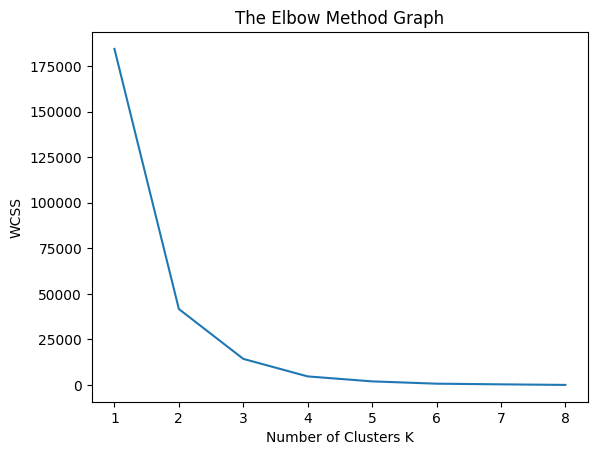

[184338.22222222222,
 41658.14285714286,
 14304.833333333334,
 4682.900000000001,
 1960.1666666666665,
 695.6666666666666,
 334.0,
 15.0]

In [68]:
print(X)
lst=[]
for i in range(1,9):
    kmeansClf= KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeansClf.fit(X)
    lst.append(kmeansClf.inertia_)
plt.plot(range(1, 9), lst)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of Clusters K')
plt.ylabel('WCSS')
plt.show()
lst

In [69]:
kmeansClf = KMeans(n_clusters=3, init='k-means++', random_state= 42)
predictions= kmeansClf.fit_predict(X)
print(kmeansClf.cluster_centers_[:, :])

[[ 80.           1.5          4.66666667]
 [250.           1.           2.        ]
 [500.           1.           4.        ]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


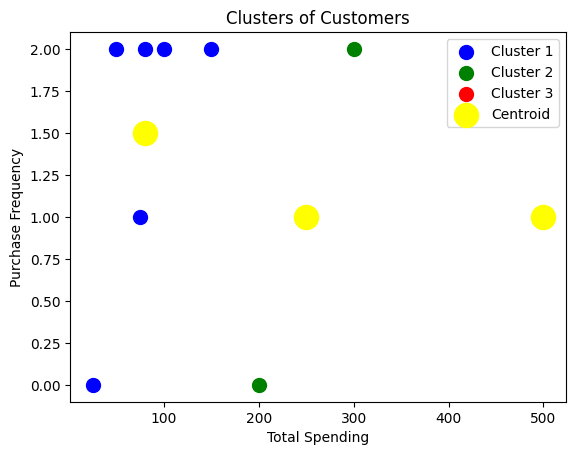

In [70]:
plt.scatter(X[predictions == 0, 0], X[predictions == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[predictions == 1, 0], X[predictions == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[predictions== 2, 0], X[predictions== 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(kmeansClf.cluster_centers_[:, 0], kmeansClf.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')
plt.title('Clusters of Customers')
plt.xlabel('Total Spending')
plt.ylabel('Purchase Frequency')
plt.legend()
plt.show()